In [1]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [3]:

# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


In [4]:

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:

Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


In [7]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
__________________________________________________

In [8]:

H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)
model.save('bpham.h5')


Epoch 1/10
1563/1563 [==============================] - 38s 4ms/step - loss: 0.7720 - accuracy: 0.7626 - val_loss: 0.0728 - val_accuracy: 0.9806
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0656 - accuracy: 0.9815 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0390 - accuracy: 0.9884 - val_loss: 0.0454 - val_accuracy: 0.9874
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0253 - accuracy: 0.9927 - val_loss: 0.0423 - val_accuracy: 0.9875
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0157 - accuracy: 0.9961 - val_loss: 0.0410 - val_accuracy: 0.9875
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0110 - accuracy: 0.9975 - val_loss: 0.0453 - val_accuracy: 0.9870
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0434 - val_accuracy

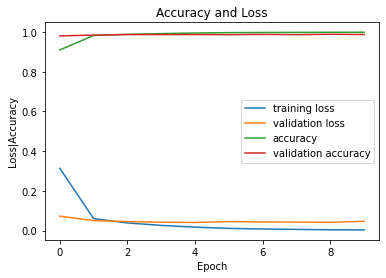

In [9]:

fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [10]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.0436379574239254, 0.9873999953269958]


Giá trị dự đoán:  4


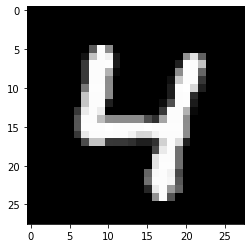

In [11]:

plt.imshow(X_test[56].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[56].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))